# Word Cloud

#### Keywords are an efficient way to capture the main elements of a scientific paper. Instead of giving a plain list, we will build a Word Cloud as a fun way to visualize them





Packages that we'll be using:

In [1]:
#!pip3 install wordcloud
#!pip install textract
#!pip install wordcloud
#!pip install nltk
#!pip install collection
#pip install --upgrade PyPDF2==2.12.1

In [2]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import PyPDF2
import requests, PyPDF2
from io import BytesIO
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')

We'll analyze my first published paper:

* Tress, M., “SHARDS: constraints on the dust attenuation law of star-forming galaxies at z~2”, Monthly Notices of the Royal Astronomical Society, vol. 475, no. 2, pp. 2363–2374, 2018. doi:10.1093/mnras/stx3334.


### The first step is to get the research paper PDF from ArXiv, an open-access repository of electronic prints

In [4]:
url = 'https://arxiv.org/pdf/1801.01128.pdf'
response = requests.get(url)
shards_pdf = response.content



### Then, we proceed to convert the PDF to a string

In [5]:
with BytesIO(shards_pdf) as SPDF:
    PDFreader = PyPDF2.PdfFileReader(SPDF)
    num_pages = PDFreader.numPages
    text = ""
    for pp in range(num_pages):
        page = PDFreader.getPage(pp)
        text += page.extractText()
    

### We transform our string into substrings (words) using nltk.word_tokenize as a way to remove punctuation and find words

In [7]:
substring = nltk.word_tokenize(text)

### We create lists for punctuation and stop words in English to eliminate unimportant words and symbols. We  employ stop words from NLTK library, but we will expand this list to include other words

`remove`     includes both stop words and punctuation

In [41]:
#Define lists
diffpunctuation = ['(',')',';','/','–','˜','‹','<','−',"'",':','[',']',',','.','--','-','#','!','*','"',
                    '%','´','∼']
stop_words = stopwords.words('english')
extra_words=['et','al','fig','e','b','apj','v','j','g','shown','show','shows','note','n','l','downloaded','http','x060','x00v'
            ,'ect','c','x13','d','de','p','x182','erez gonz']

#Define remove
remove = STOPWORDS #Stop words from NLTK
remove.update(stop_words)
remove.update(diffpunctuation)
remove.update(extra_words)


### The next step is to remove these words from the text saved in `substring`

In [42]:
#We transform all words to lowercase
substring = [x.lower() for x in substring]

#We define substring as the words that are already in substring but not in remove
substring = [word for word in substring if word not in remove]

#We also remove numbers because we are interested in the key words of the paper
substring = [word for word in substring if not word.isdigit()]



### We convert `substring` into `str` type and then we create a WordCloud Object


In [43]:
#From list to str type
words_shards=str(substring)
words_shards=words_shards.replace("'",'')


In [44]:
#WordCloud
shards_wc = WordCloud(background_color='white',width=2000, height=1000,max_words=1000)
shards_wc.generate(words_shards)    

### Finally, we show the Word Cloud

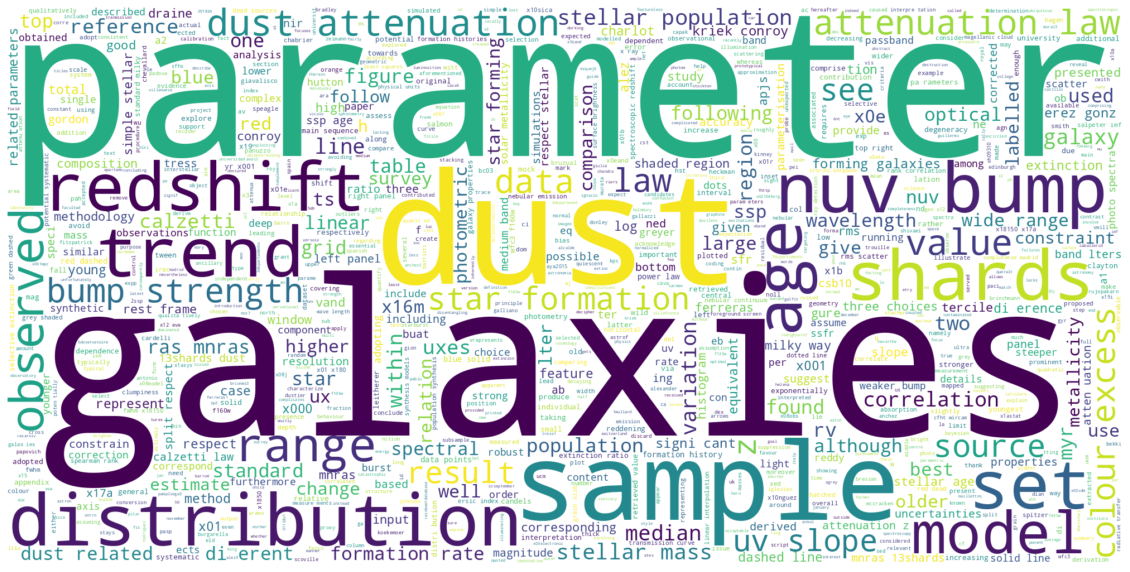

In [45]:
plt.figure(figsize=[20,15])
plt.imshow(shards_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


### The presence of these words show that the main topics of the paper are "parameter", "galaxies", "dust", "redshift" and "distribution". These words faithfully represent the keywords for the paper and my astronomical research, which was the analysis of dust in galaxies far away

### References


* https://stackoverflow.com/questions/64986673/extracting-text-from-pdf-url-file-with-python
* https://wckdouglas.github.io/2018/12/word-cloud-from-publications
* https://towardsdatascience.com/word-clouds-in-python-comprehensive-example-8aee4343c0bf
* https://towardsdatascience.com/pdfs-to-word-cloud-in-3-steps-73ccbff6d835
